# Lead Score Case Study (Uttkarsh Mishra)

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goal

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing Data

In [2]:
#ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading data and display
df= pd.read_csv(r'F:\Upgrad Notes\Machine Learning 1\Lead Score Case Study(Logistic Regression)\leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#shape of dataframe

df.shape

(9240, 37)

In [6]:
#info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#statistical analysis

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)

df = df.replace('Select',np.nan)

In [9]:
#checking null values of dataframe

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#percentage of null values

100*(df.isnull().sum())/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
#drop columns with more than 30% null values

df1 = df.drop(['Specialization', 'Tags', 'Lead Quality', 'Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','How did you hear about X Education','City'],axis=1)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [12]:
#percentage of null values after deleting columns

100*(df1.isnull().sum())/len(df1)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [13]:
#checking unique values in dataframe

df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
#checking values in "Magzine" column

df1['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [15]:
#checking values in "Magzine" column

df1['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [16]:
#checking values in 'Receive More Updates About Our Courses' column

df1['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [17]:
#checking values in 'Update me on Supply Chain Content' column

df1['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [18]:
#checking values in 'Get updates on DM Content' column

df1['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [19]:
#checking values in 'Receive More Updates About Our Courses' column

df1['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

* As 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' contains only single value, therefore we can drop these.

In [20]:
#dropping 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' as it contains only 1 unique response which might not help in analysis

df1= df1.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis= 1)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


### -Missing value Treatment:

In [21]:
#percentage of null values after deleting columns

100*(df1.isnull().sum())/len(df1)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [22]:
#checking unique values in dataframe

df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [23]:
# getting all categorical columns

df1.select_dtypes(exclude=['int', 'float']).columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted',
       'Total Time Spent on Website', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
#getting all numerical columns

df1.select_dtypes(include=['int', 'float']).columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

#### Checking Categorical Variables:

In [25]:
#checking values in 'Lead Origin'

df1['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [26]:
#checking values in 'Lead Source'

df1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [27]:
#checking null valuesin 'Lead Source' column

df1['Lead Source'].isnull().sum()

36

In [28]:
#goole has two entries i.e. "google", "Google". Merge it into one
#only 36 values are null, we can replace it with 'Google'

df1['Lead Source'] = df1['Lead Source'].replace('google', 'Google')
df1['Lead Source'] = df1['Lead Source'].replace(np.nan, 'Google')

In [29]:
#checking values in 'Lead Source'

df1['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [30]:
#checking values in 'Do Not Email'

df1['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [31]:
#checking values in 'Total Time Spent on Website'

df1['Total Time Spent on Website'].value_counts()

0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [32]:
#checking values in 'Last Activity'

df1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
#checking null values in 'Last Activity' column

df1['Last Activity'].isnull().sum()

103

In [34]:
#replacing null values in 'Last Activity' by 'Email Opened'

df1['Last Activity'] = df1['Last Activity'].replace(np.nan, 'Email Opened')
df1['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
#checking values in 'Country'

df1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Bangladesh                 2
Ghana                      2
Belgium                    2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Russia                     1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Switzerland                1
Malaysia                   1
Tanzania      

In [36]:
#checking null values in 'Country' column

100*(df1['Country'].isnull().sum())/len(df1['Country'])

26.634199134199132

* since, 26% values in this columns are null and most of the columns have values= 'India', therefore we can drop this column.

In [37]:
#dropping 'Country' column

df1= df1.drop(['Country'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [38]:
#checking values in 'What is your current occupation'

df1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
#checking null values in 'What is your current occupation' column.

df1['What is your current occupation'].isnull().sum()

2690

* There are about 2690 null values. If we replace it with any value present, it may affect the data. We will replace null with 'Not Available'.

In [40]:
#replacin null values in 'What is your current occupation' column.

df1['What is your current occupation'] = df1['What is your current occupation'].replace(np.nan, 'Not Available')
df1['What is your current occupation'].value_counts()

Unemployed              5600
Not Available           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
#checking values in 'What matters most to you in choosing a course'

df1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
#checking null values in 'What matters most to you in choosing a course' column

df1['What matters most to you in choosing a course'].isnull().sum()

2709

* There are 2709 null values and there are not much variation in the columns present. so, we can drop those columns.

In [43]:
# dropping 'What matters most to you in choosing a course' column.

df1= df1.drop(['What matters most to you in choosing a course'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [44]:
#checking values in 'Last Notable Activity'

df1['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

#### Checking Numerical Variables:

In [45]:
#checking values in 'TotalVisits'

df1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [46]:
#checking null values in 'TotalVisits column'

df1['TotalVisits'].isnull().sum()

137

In [47]:
#eplacing null values with median value

df1['TotalVisits'] = df1['TotalVisits'].replace(np.nan, df1['TotalVisits'].median())
df1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [48]:
#checking values in 'Page Views Per Visit'

df1['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [49]:
#checking null values in 'Page Views Per Visit'

df1['Page Views Per Visit'].isnull().sum()

137

* We will replace these 137 values with median of the column.

In [50]:
#replacing null values with median value

df1['Page Views Per Visit'] = df1['Page Views Per Visit'].replace(np.nan, df1['Page Views Per Visit'].median())
df1['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [51]:
#info of dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [52]:
#checking null values of dataframe

100*df1.isnull().sum()/len(df1)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [53]:
#checking unique values in dataframe

df1.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

**All the null/missing values have been treated.**

### - Outlier Treatment:

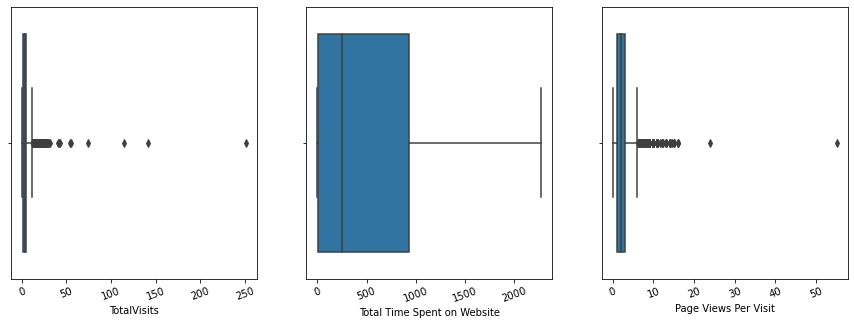

In [54]:
# Box Plot
plt.figure(figsize=(15, 5))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation=20)

In [55]:
# Checking values at different percentiles

df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [56]:
# Removing values beyond 99% for Total Visits

total_visits_quantile = df1['TotalVisits'].quantile(0.99)
df1 = df1[df1["TotalVisits"] <= total_visits_quantile]
df1["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9157.000000
mean        3.203888
std         2.967759
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        17.000000
Name: TotalVisits, dtype: float64

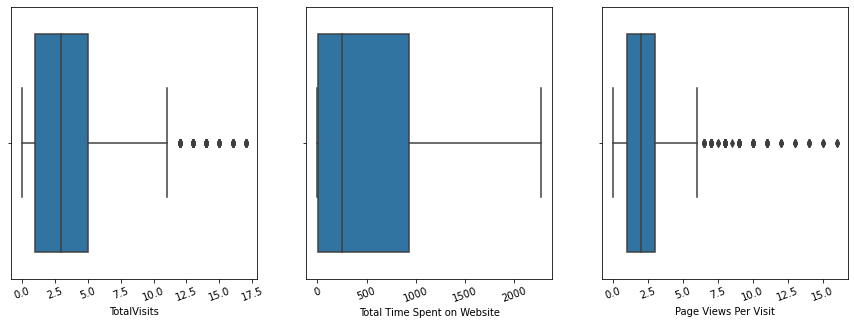

In [57]:
# Box Plot
plt.figure(figsize=(15, 5))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation=20)

In [58]:
# Checking values at different percentiles

df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000
mean,617229.666921,0.384951,3.203888,486.189036,2.332225
std,23420.299927,0.486610,2.967759,547.695908,2.047285
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596507.000000,0.000000,1.000000,10.000000,1.000000
50%,615558.000000,0.000000,3.000000,247.000000,2.000000
75%,637414.000000,1.000000,5.000000,933.000000,3.000000
90%,650522.000000,1.000000,7.000000,1379.000000,5.000000
95%,655423.800000,1.000000,9.000000,1559.400000,6.000000
99%,659603.080000,1.000000,13.000000,1839.440000,9.000000


In [59]:
# Removing values beyond 99% for Page Views Per Visit

Page_Views_Per_Visit_quantile = df1['Page Views Per Visit'].quantile(0.99)
df1 = df1[df1["Page Views Per Visit"] <= Page_Views_Per_Visit_quantile]
df1["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9090.000000
mean        2.262836
std         1.881164
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

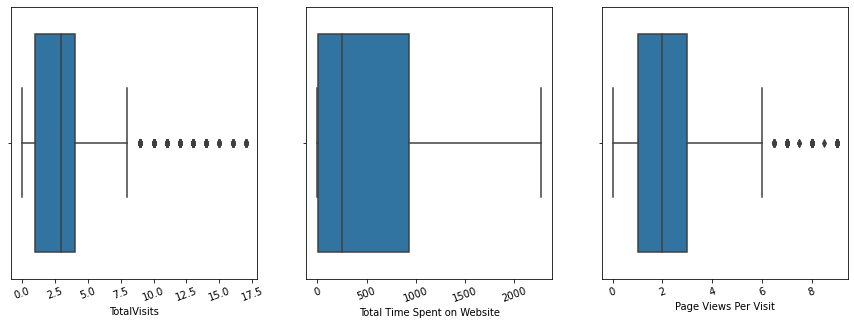

In [60]:
# Box Plot

plt.figure(figsize=(15, 5))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation=20)

In [61]:
# Checking values at different percentiles

df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596502.500000,0.000000,1.000000,9.000000,1.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
75%,637360.750000,1.000000,4.000000,930.000000,3.000000
90%,650480.400000,1.000000,7.000000,1378.000000,5.000000
95%,655359.700000,1.000000,9.000000,1558.000000,6.000000
99%,659583.980000,1.000000,13.000000,1840.110000,8.000000


## Step 3: Exploratory Data Analysis

###  Univariate Analysis:

#### Categorical Column:

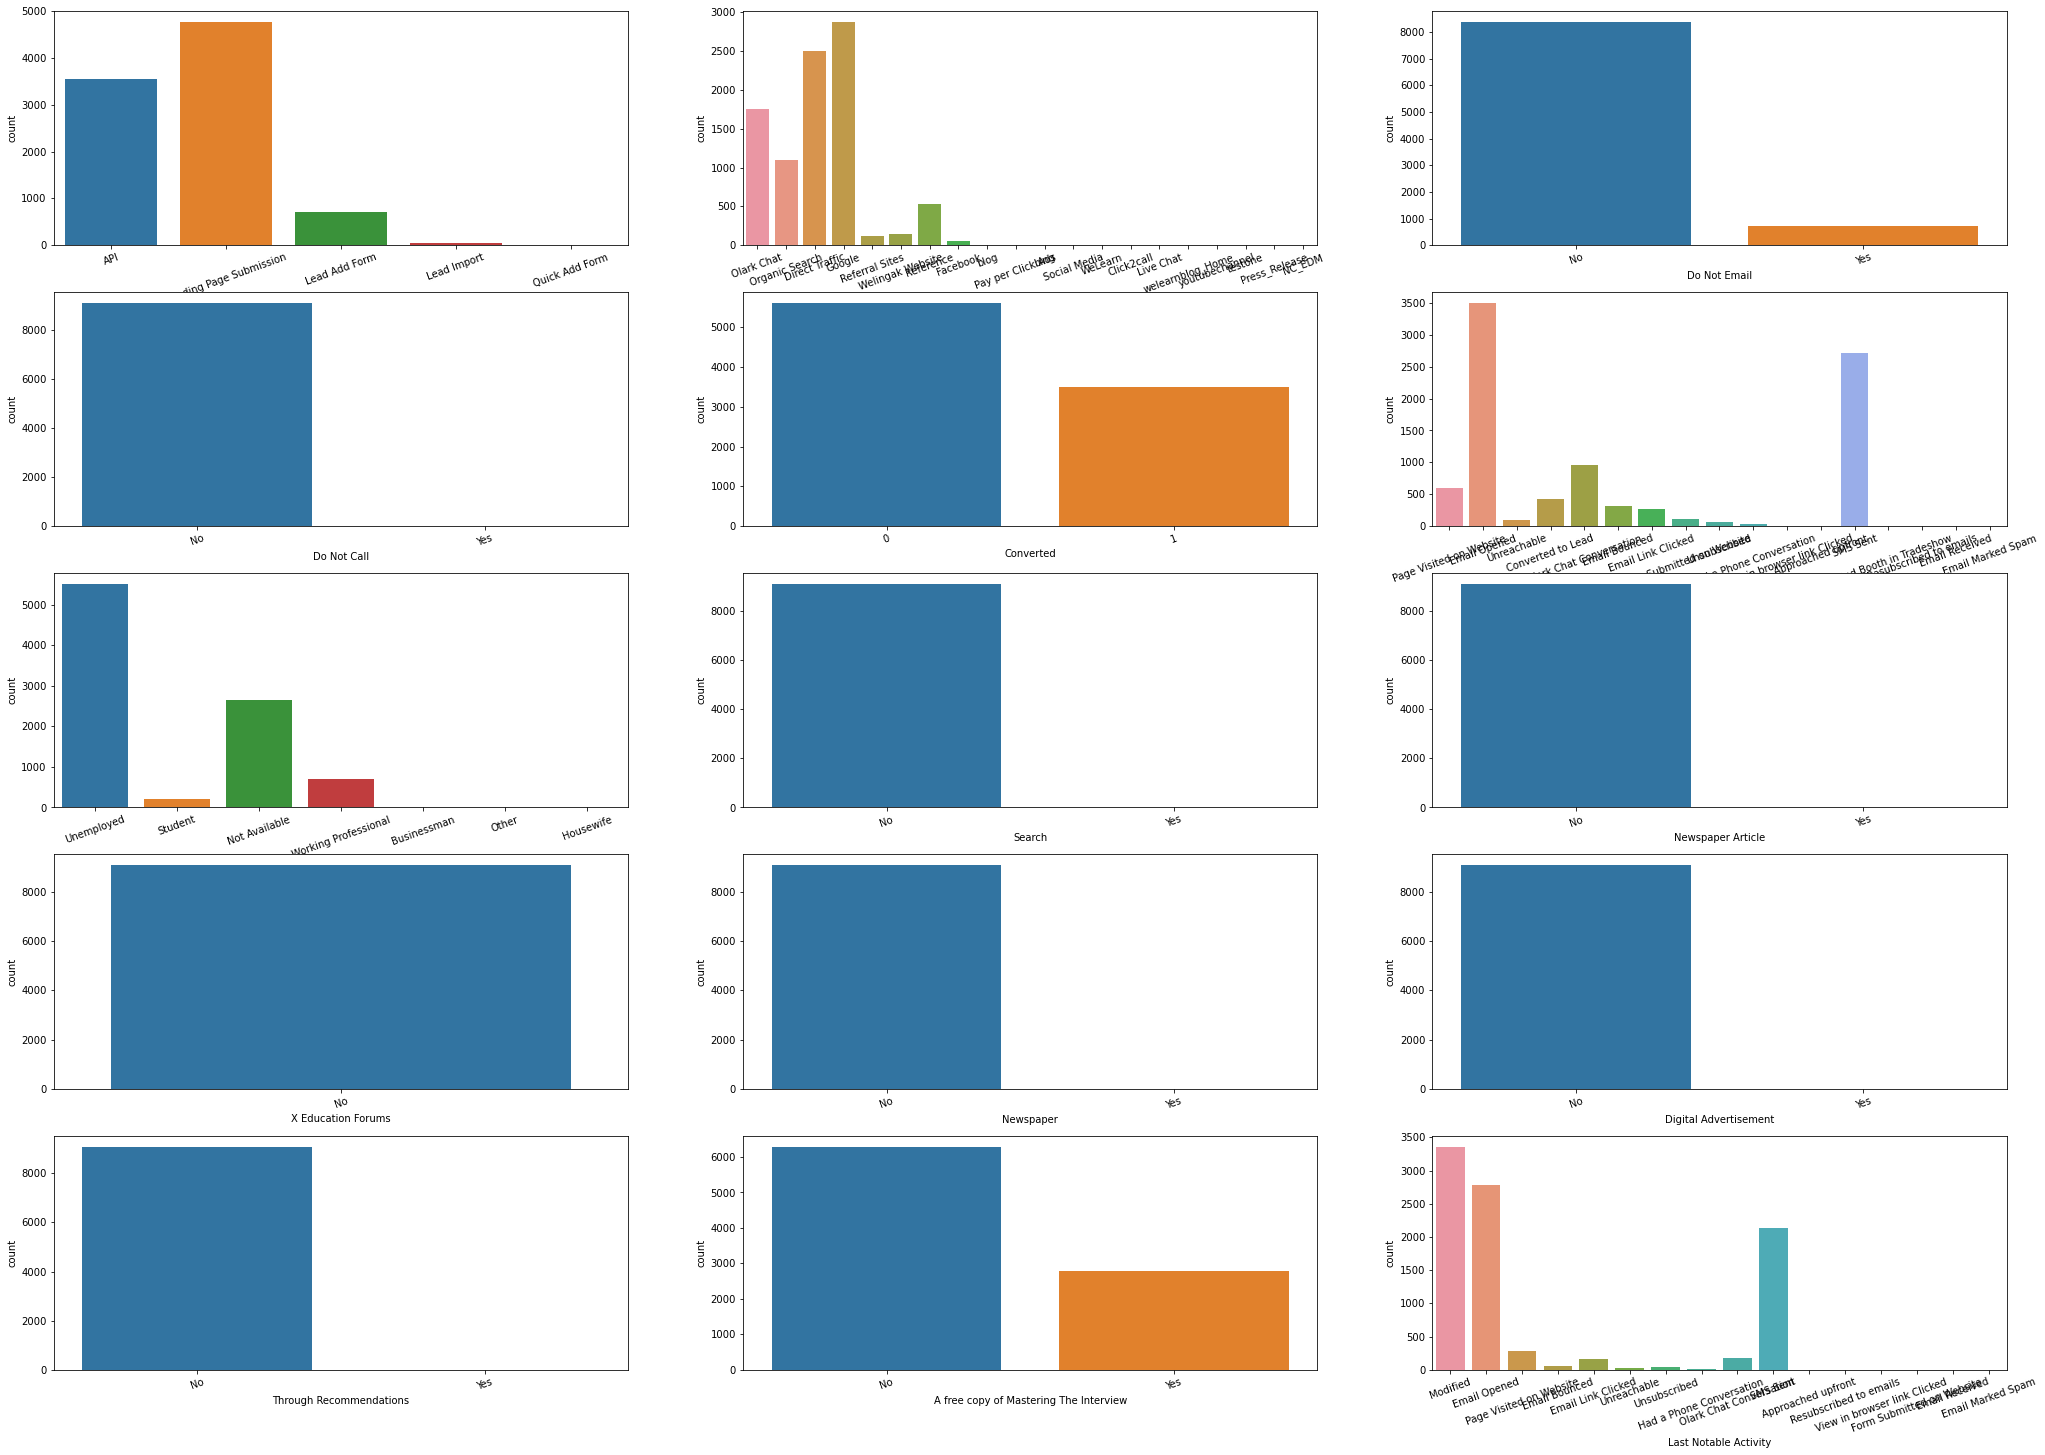

In [62]:
# Bar Plot
plt.figure(figsize=(35, 25))
features = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']
for i in enumerate(features):
    ax = plt.subplot(5, 3, i[0]+1)
    sns.countplot(df1[i[1]])
    plt.xticks(rotation=20)

In [63]:
# As 'X Education Forums' now has single value, we can drop it
df1= df1.drop(['X Education Forums'], axis=1)

In [64]:
#distinct values in 'Do Not Call'

df1['Do Not Call'].value_counts()

No     9088
Yes       2
Name: Do Not Call, dtype: int64

In [65]:
#distinct values in 'Search'


df1['Search'].value_counts()

No     9077
Yes      13
Name: Search, dtype: int64

In [66]:
#distinct values in 'Newspaper Article'


df1['Newspaper Article'].value_counts()

No     9089
Yes       1
Name: Newspaper Article, dtype: int64

In [67]:
#distinct values in 'Newspaper'


df1['Newspaper'].value_counts()

No     9089
Yes       1
Name: Newspaper, dtype: int64

In [68]:
#distinct values in 'Digital Advertisement'


df1['Digital Advertisement'].value_counts()

No     9087
Yes       3
Name: Digital Advertisement, dtype: int64

In [69]:
#distinct values in 'Through Recommendations'


df1['Through Recommendations'].value_counts()

No     9084
Yes       6
Name: Through Recommendations, dtype: int64

* As in 'Do Not Call', 'Newspaper Article', 'Newspaper', 'Digital Advertisement' value for yes are 2, 1, 1, 3 respectively. So these will not help in analysis so we can drop.

In [70]:
#Droping columns

df1= df1.drop(['Do Not Call', 'Newspaper Article', 'Newspaper', 'Digital Advertisement'], axis=1)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,Modified


In [71]:
#checking categorical columns

df1.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

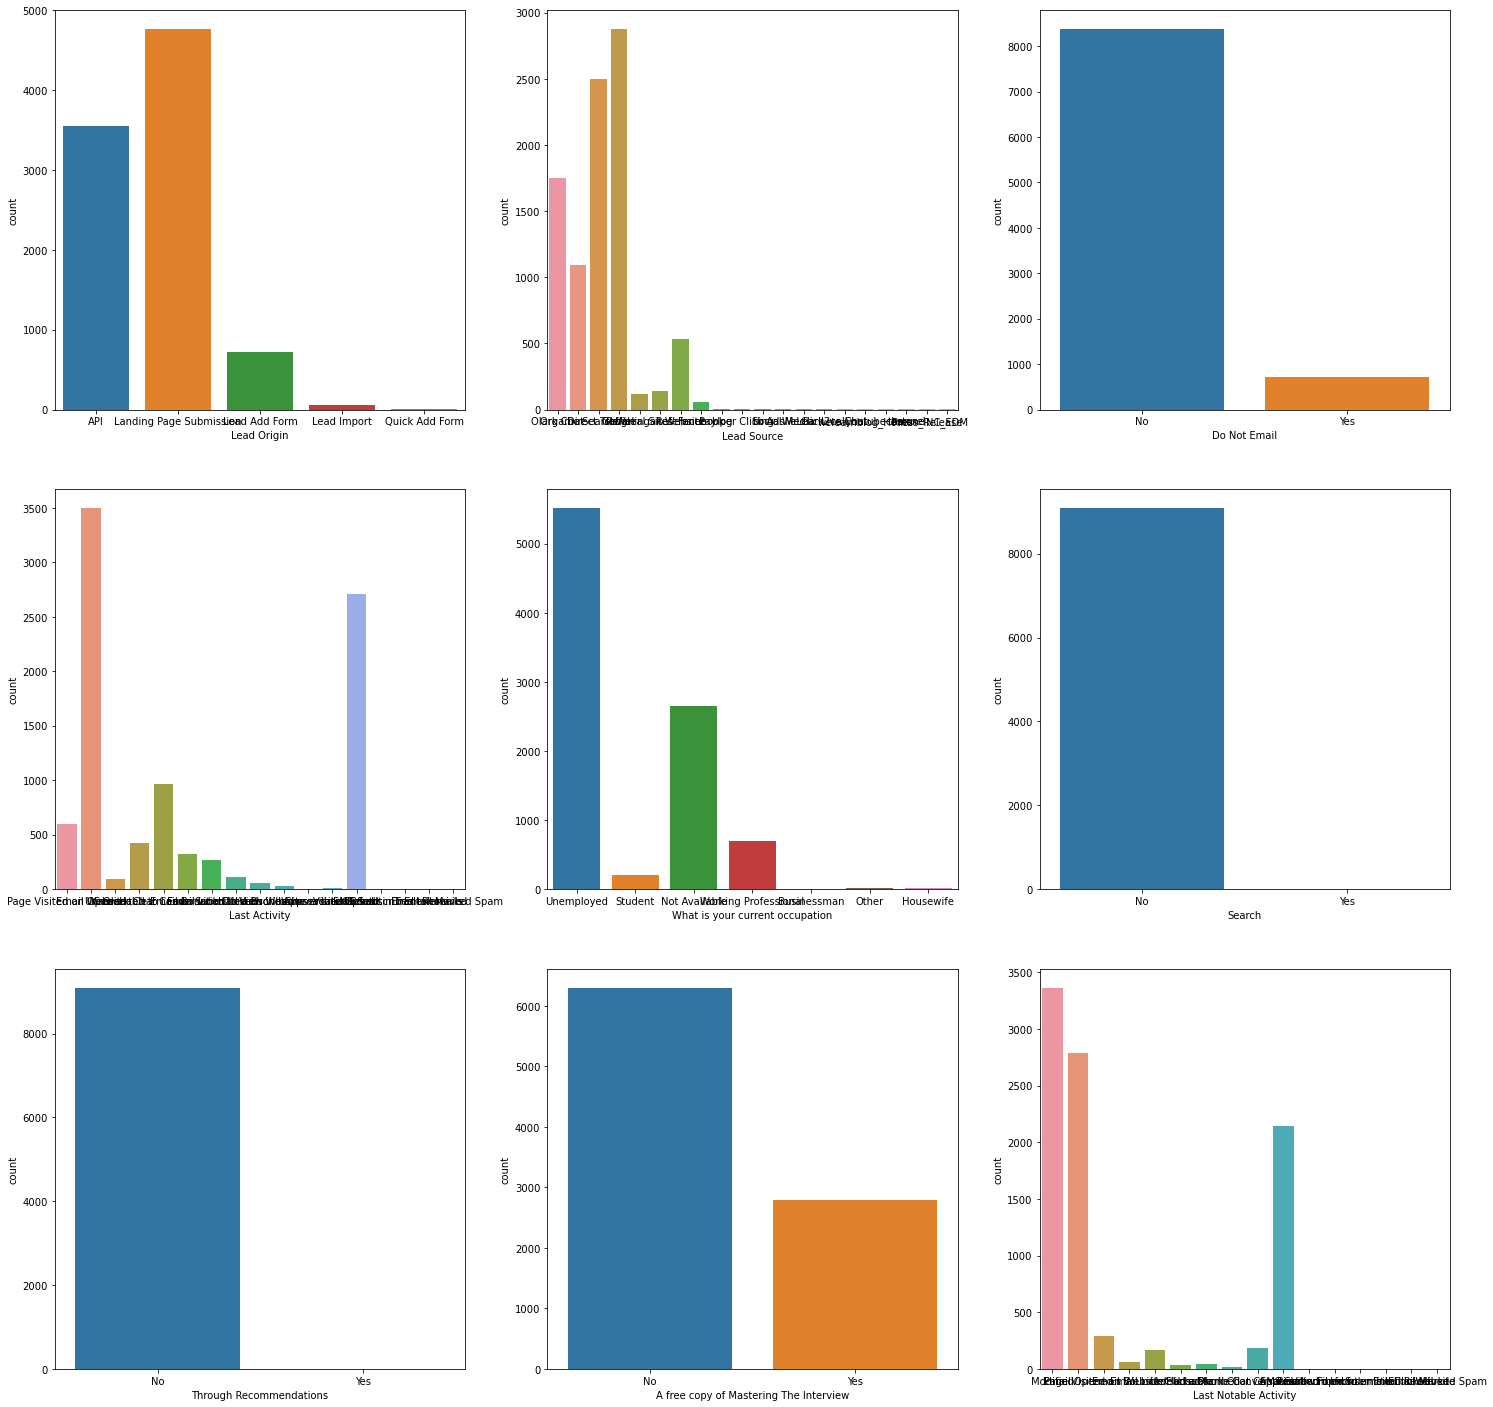

In [72]:
# Bar Plot

plt.figure(figsize=(25, 25))
features = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.countplot(df1[i[1]])
    #plt.xticks(rotation=20)

#### Numerical Column:

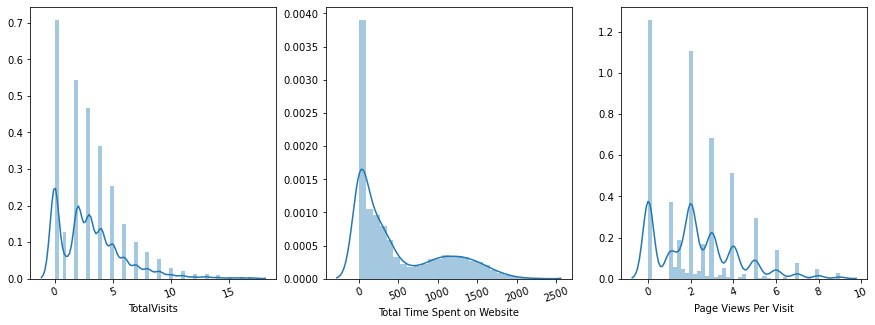

In [73]:
# Dist Plot

plt.figure(figsize=(15, 5))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.distplot(df1[i[1]])
    plt.xticks(rotation=20)

### Bivariate Analysis:

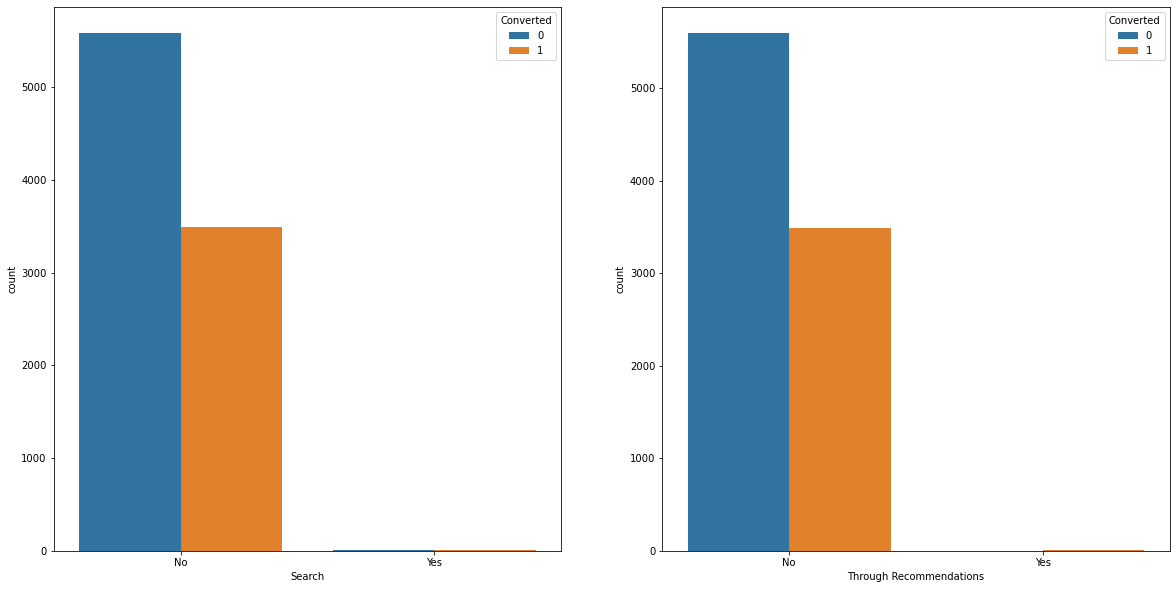

In [74]:
#count plot

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(data= df1 , hue='Converted', x='Search')

plt.subplot(1,2,2)
sns.countplot(data= df1 , hue='Converted', x='Through Recommendations')

plt.show()

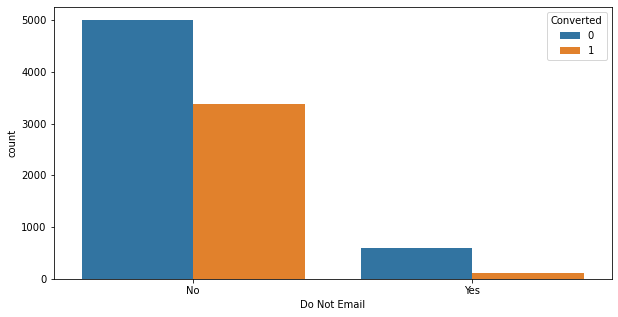

In [75]:
#count plot

plt.figure(figsize = (10, 5))

sns.countplot(data= df1 , hue='Converted', x='Do Not Email')

plt.show()

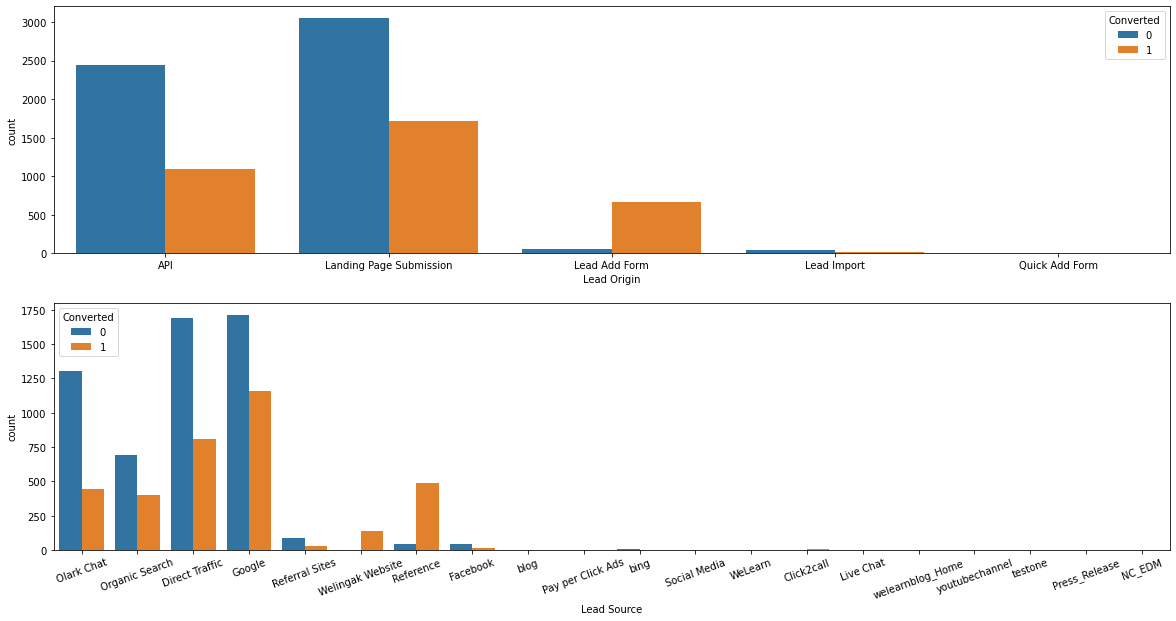

In [76]:
#count plot  

plt.figure(figsize = (20, 10))

plt.subplot(2, 1,1)
sns.countplot(data= df1 , hue='Converted', x='Lead Origin')

plt.subplot(2,1,2)
sns.countplot(data= df1 , hue='Converted', x='Lead Source').tick_params(axis='x', rotation = 20)

plt.show()

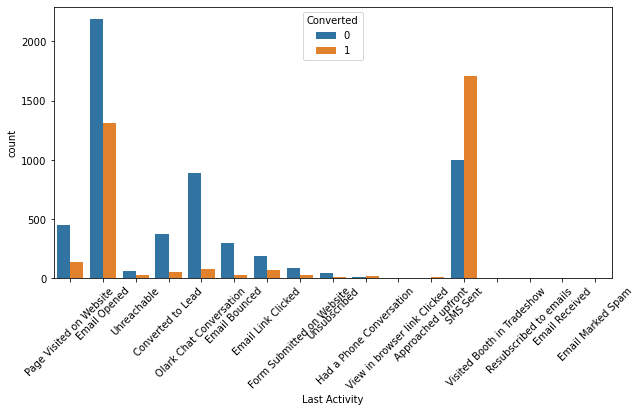

In [77]:
#bar plot

plt.figure(figsize = (10, 5))

sns.countplot(data= df1 , hue='Converted', x='Last Activity').tick_params(axis='x', rotation = 45)

plt.show()

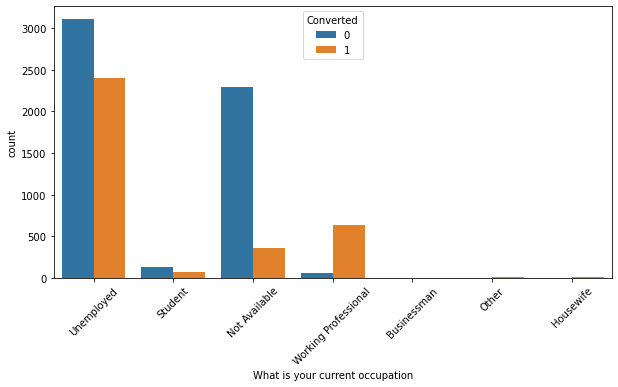

In [78]:
#countplot

plt.figure(figsize = (10, 5))

sns.countplot(data= df1 , hue='Converted', x='What is your current occupation').tick_params(axis='x', rotation = 45)

plt.show()

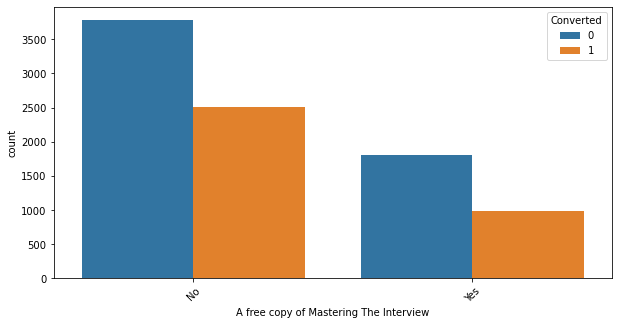

In [79]:
#count plot

plt.figure(figsize = (10, 5))

sns.countplot(data= df1 , hue='Converted', x='A free copy of Mastering The Interview').tick_params(axis='x', rotation = 45)

plt.show()

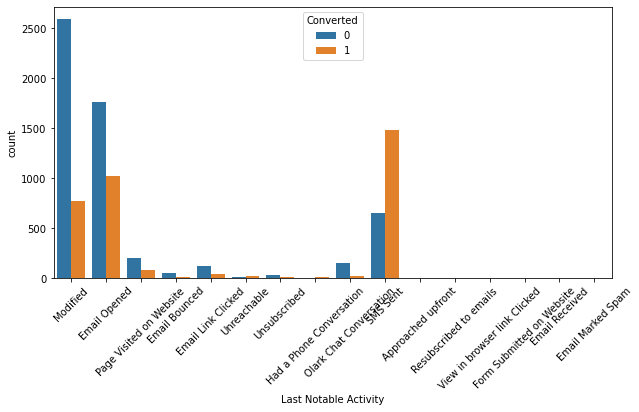

In [80]:
#count plot

plt.figure(figsize = (10, 5))

sns.countplot(data= df1 , hue='Converted', x='Last Notable Activity').tick_params(axis='x', rotation = 45)

plt.show()

## Step 4: Creating Dummies

In [81]:
variablelist =  ['Do Not Email', 'Search', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df1[variablelist] = df1[variablelist].apply(binary_map)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,Modified


In [82]:
# categorical columns

df1.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [83]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

dummy1 = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
# Adding the results to the df1 dataframe

df1 = pd.concat([df1, dummy1], axis=1)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [85]:
#dropping columns whose dummy variable have been created

df1 = df1.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'], axis = 1)
df1.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 5: Train- Test Split

In [86]:
#importing library for train-test split

from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variable to X
X = df1.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
# Putting response variable to y

y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

* We are using MinMax Scaler.

In [90]:
#importing libraries

from sklearn.preprocessing import MinMaxScaler

In [91]:
#finding numerical columns in X_train for scaling

X_train.select_dtypes(include=['int', 'float']).columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

In [92]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
302,0,0.411765,0.110035,0.258889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1033,0,0.294118,0.206866,0.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7656,1,0.352941,0.154930,0.666667,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3241,0,0.235294,0.428257,0.147778,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
### Checking the Conversion Rate

converted = round((sum(df1['Converted'])/len(df1['Converted'].index))*100, 2)
converted

38.45

* As of now, Conversion rate is about 38.45%

### Correlation Matrix

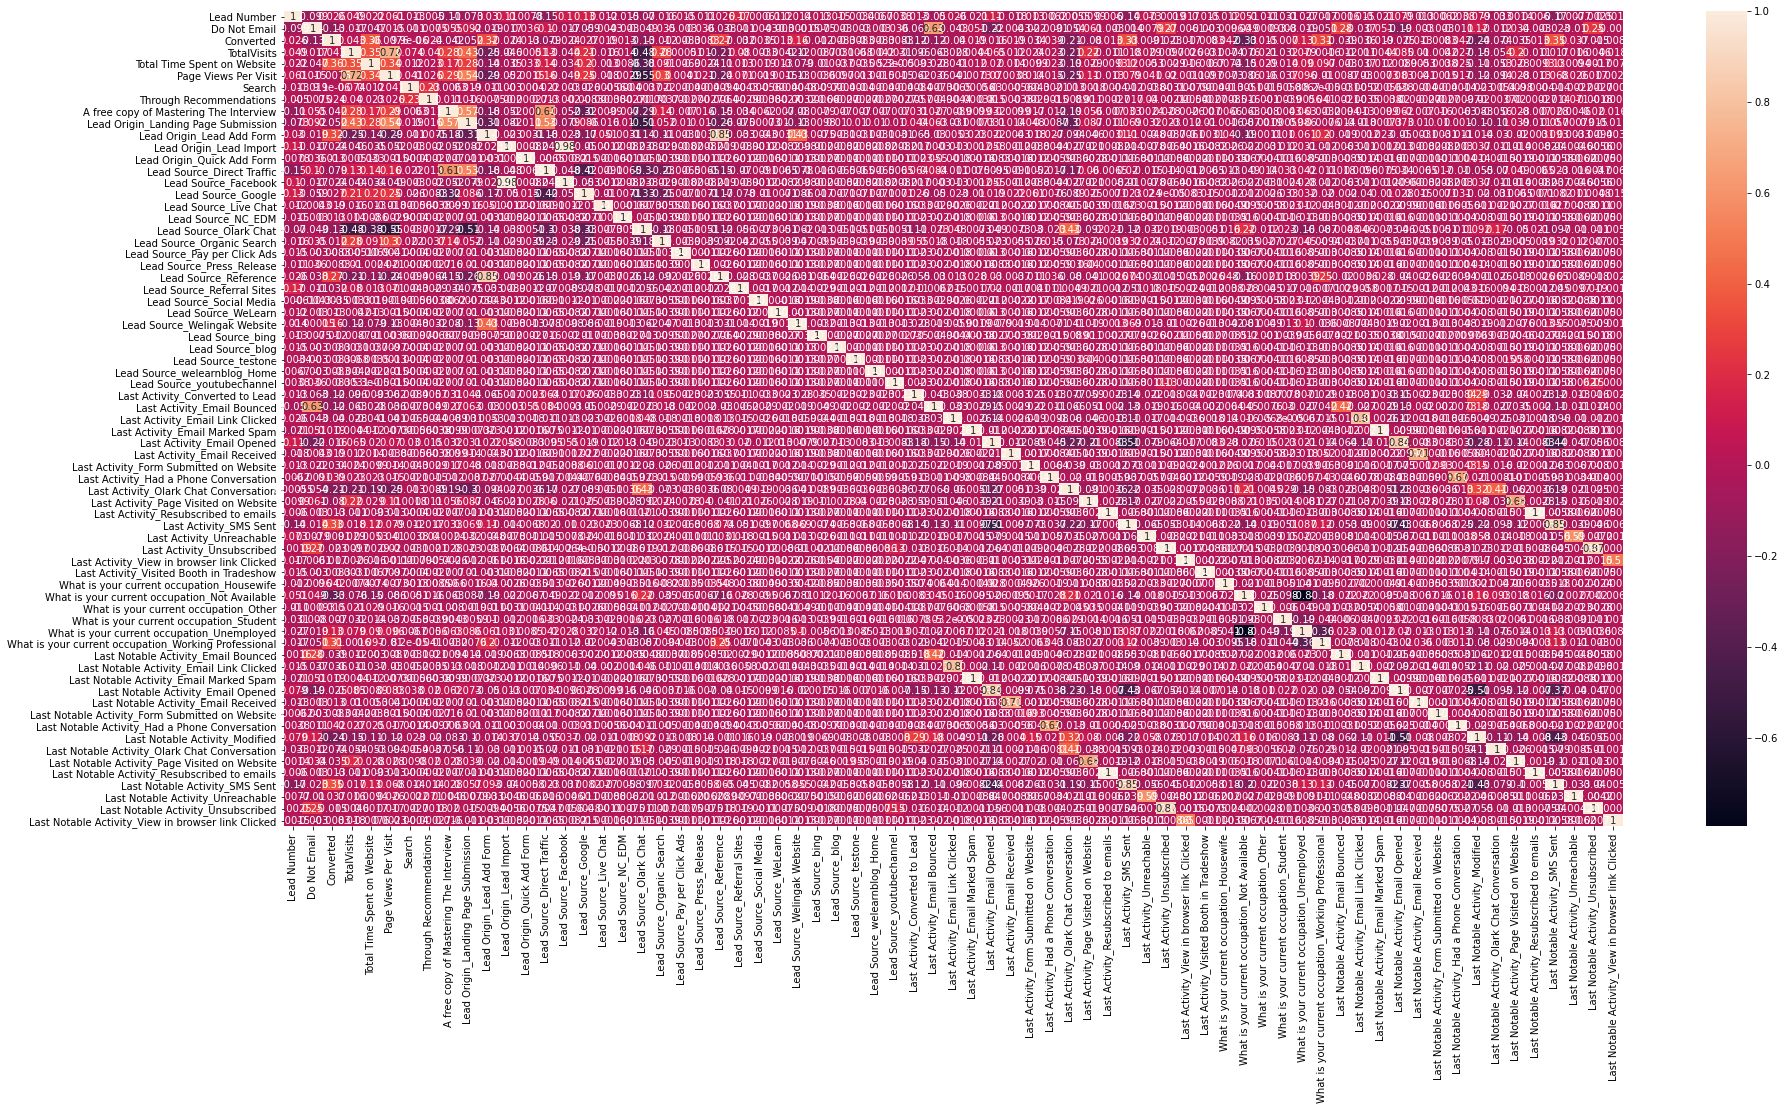

In [94]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df1.corr(),annot = True)
plt.show()

* Since there are soo many variables, we cannot find correlated variables using HeatMap. Therefore, we will use some other methods to find/remove correlated matrix.

## Step 7: Model Building

**Let's start with initial Moddel**

In [95]:
#impoorting statsmodel library

import statsmodels.api as sm

In [96]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.7
Date:                Thu, 07 Jan 2021   Deviance:                       4961.5
Time:                        20:31:15   Pearson chi2:                 6.47e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   44.2369   1.57e+05      0.000      1.000   -3.07e+05    3.07e+05
Do Not Email                                            -1.3426      0.213     -6.299      0.000      -1.760      -0.925
TotalVisits                                              1.5600      0.308      5.070      0.000       0.957       2.163
Total Time Spent on Website                              4.4430      0.172     25.826      0.000       4.106       4.780
Page Views Per Visit                                    -0.9820      0.282     -3.481      0.000      -1.535      -0.429
Search                                                   0.2306      0.890      0.259      0.795      -1.513       1.974
Through Recommendations                                 22.5996   6.08e+04      0.000      1.000   -1.19e+05    1.19e+05
A free copy of Mastering The Interview                  -0.0278      0.111     -0.250      0.803      -0.246       0.190
Lead Origin_Landing Page Submission                     -0.1295      0.111     -1.166      0.243      -0.347       0.088
Lead Origin_Lead Add Form                                3.1956      0.689      4.639      0.000       1.845       4.546
Lead Origin_Lead Import                                 24.4924   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Quick Add Form                              24.3832   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                             -21.4190   8.56e+04     -0.000      1.000   -1.68e+05    1.68e+05
Lead Source_Facebook                                   -45.9818   1.57e+05     -0.000      1.000   -3.07e+05    3.07e+05
Lead Source_Google                                     -21.0377   8.56e+04     -0.000      1.000   -1.68e+05    1.68e+05
Lead Source_Live Chat                                    0.5969   1.26e+05   4.73e-06      1.000   -2.47e+05    2.47e+05
Lead Source_NC_EDM                                       4.2602   1.57e+05   2.72e-05      1.000   -3.07e+05    3.07e+05
Lead Source_Olark Chat                                 -20.0804   8.56e+04     -0.000      1.000   -1.68e+05    1.68e+05
Lead Source_Organic Search                             -21.4119   8.56e+04     -0.000      1.000   -1.68e+05    1.68e+05
Lead Source_Pay per Click Ads                        -2.866e-08      0.000     -0.000      1.000      -0.000       0.000
Lead Source_Press_Release                              -42.1772   1.57e+05     -0.000      1.000   -3.07e+05    3.07e+05
Lead Source_Reference                                  -21.1771   8.56e+04     -0.000      1.000   -1.68e+05    1.68e+05
Lead Source_Referral Sites                             -21

## Step 8: Feature Selection using RFE

In [97]:
#importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [98]:
# running RFE with 17 variables as output

rfe = RFE(logreg, 17)             
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False])

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 39),
 ('Through Recommendations', False, 22),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 42),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True,

In [101]:
col = X_train.columns[rfe.support_]

In [102]:
X_train.columns[~rfe.support_]

Index(['Search', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phon

##### 2nd Model:

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.4
Date:                Thu, 07 Jan 2021   Deviance:                       5062.7
Time:                        20:31:23   Pearson chi2:                 6.36e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0636      0.617     -1.724      0.085      -2.273       0.145
Do Not Email                                            -1.3560      0.169     -8.013      0.000      -1.688      -1.024
TotalVisits                                              1.3609      0.289      4.717      0.000       0.795       1.926
Total Time Spent on Website                              4.4930      0.169     26.546      0.000       4.161       4.825
Page Views Per Visit                                    -0.8433      0.264     -3.192      0.001      -1.361      -0.325
Lead Origin_Lead Add Form                                3.4885      0.210     16.596      0.000       3.076       3.900
Lead Source_Olark Chat                                   1.3122      0.131     10.043      0.000       1.056       1.568
Lead Source_Welingak Website                             2.7572      1.026      2.688      0.007       0.747       4.768
Last Activity_Olark Chat Conversation                   -0.8829      0.170     -5.195      0.000      -1.216      -0.550
Last Activity_SMS Sent                                   1.3210      0.077     17.172      0.000       1.170       1.472
What is your current occupation_Housewife               22.9803   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
What is your current occupation_Not Available           -2.1561      0.610     -3.537      0.000      -3.351      -0.961
What is your current occupation_Student                 -0.9533      0.644     -1.481      0.139      -2.215       0.308
What is your current occupation_Unemployed              -0.9480      0.606     -1.565      0.118      -2.135       0.239
What is your current occupation_Working Professional     1.5569      0.631      2.468      0.014       0.320       2.794
Last Notable Activity_Had a Phone Conversation          23.9068   2.36e+04      0.001      0.999   -4.63e+04    4.63e+04
Last Notable Activity_Modified                          -0.7171      0.082     -8.722      0.000      -0.878      -0.556
Last Notable Activity_Unreachable                        2.2286      0.634      3.513      0.000       0.985       3.472
========================================================================================================================
"""

In [104]:
col = col.drop('What is your current occupation_Housewife',1)

##### 3rd Model:

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.4
Date:                Thu, 07 Jan 2021   Deviance:                       5068.8
Time:                        20:31:23   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3392      0.543     -0.625      0.532      -1.403       0.724
Do Not Email                                            -1.3610      0.169     -8.033      0.000      -1.693      -1.029
TotalVisits                                              1.3433      0.288      4.658      0.000       0.778       1.909
Total Time Spent on Website                              4.4898      0.169     26.542      0.000       4.158       4.821
Page Views Per Visit                                    -0.8489      0.264     -3.213      0.001      -1.367      -0.331
Lead Origin_Lead Add Form                                3.4831      0.210     16.584      0.000       3.071       3.895
Lead Source_Olark Chat                                   1.3044      0.131      9.993      0.000       1.049       1.560
Lead Source_Welingak Website                             2.7562      1.026      2.687      0.007       0.746       4.767
Last Activity_Olark Chat Conversation                   -0.8863      0.170     -5.209      0.000      -1.220      -0.553
Last Activity_SMS Sent                                   1.3201      0.077     17.160      0.000       1.169       1.471
What is your current occupation_Not Available           -2.8714      0.537     -5.345      0.000      -3.924      -1.819
What is your current occupation_Student                 -1.6695      0.575     -2.902      0.004      -2.797      -0.542
What is your current occupation_Unemployed              -1.6637      0.533     -3.124      0.002      -2.708      -0.620
What is your current occupation_Working Professional     0.8408      0.561      1.499      0.134      -0.258       1.940
Last Notable Activity_Had a Phone Conversation          22.9096   1.43e+04      0.002      0.999   -2.81e+04    2.81e+04
Last Notable Activity_Modified                          -0.7190      0.082     -8.751      0.000      -0.880      -0.558
Last Notable Activity_Unreachable                        2.2288      0.634      3.513      0.000       0.985       3.472
========================================================================================================================
"""

In [106]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

#### 4th Model:

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.2
Date:                Thu, 07 Jan 2021   Deviance:                       5082.4
Time:                        20:31:24   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3464      0.542     -0.639      0.523      -1.409       0.717
Do Not Email                                            -1.3638      0.169     -8.053      0.000      -1.696      -1.032
TotalVisits                                              1.3734      0.287      4.781      0.000       0.810       1.936
Total Time Spent on Website                              4.4821      0.169     26.552      0.000       4.151       4.813
Page Views Per Visit                                    -0.8358      0.263     -3.173      0.002      -1.352      -0.320
Lead Origin_Lead Add Form                                3.4851      0.210     16.598      0.000       3.074       3.897
Lead Source_Olark Chat                                   1.3075      0.130     10.025      0.000       1.052       1.563
Lead Source_Welingak Website                             2.7564      1.026      2.687      0.007       0.746       4.767
Last Activity_Olark Chat Conversation                   -0.8889      0.170     -5.225      0.000      -1.222      -0.555
Last Activity_SMS Sent                                   1.3109      0.077     17.064      0.000       1.160       1.462
What is your current occupation_Not Available           -2.8663      0.537     -5.339      0.000      -3.919      -1.814
What is your current occupation_Student                 -1.6651      0.575     -2.895      0.004      -2.792      -0.538
What is your current occupation_Unemployed              -1.6534      0.532     -3.106      0.002      -2.697      -0.610
What is your current occupation_Working Professional     0.8446      0.561      1.507      0.132      -0.254       1.943
Last Notable Activity_Modified                          -0.7246      0.082     -8.828      0.000      -0.886      -0.564
Last Notable Activity_Unreachable                        2.2157      0.634      3.494      0.000       0.973       3.459
========================================================================================================================
"""

In [108]:
col = col.drop('What is your current occupation_Working Professional',1)

##### 5th Model:

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.3
Date:                Thu, 07 Jan 2021   Deviance:                       5084.5
Time:                        20:31:24   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4248      0.198      2.144      0.032       0.036       0.813
Do Not Email                                     -1.3632      0.169     -8.046      0.000      -1.695      -1.031
TotalVisits                                       1.3650      0.287      4.749      0.000       0.802       1.928
Total Time Spent on Website                       4.4812      0.169     26.547      0.000       4.150       4.812
Page Views Per Visit                             -0.8406      0.263     -3.191      0.001      -1.357      -0.324
Lead Origin_Lead Add Form                         3.4815      0.210     16.584      0.000       3.070       3.893
Lead Source_Olark Chat                            1.3052      0.130     10.012      0.000       1.050       1.561
Lead Source_Welingak Website                      2.7568      1.026      2.687      0.007       0.746       4.767
Last Activity_Olark Chat Conversation            -0.8875      0.170     -5.213      0.000      -1.221      -0.554
Last Activity_SMS Sent                            1.3137      0.077     17.113      0.000       1.163       1.464
What is your current occupation_Not Available    -3.6340      0.190    -19.098      0.000      -4.007      -3.261
What is your current occupation_Student          -2.4327      0.281     -8.667      0.000      -2.983      -1.883
What is your current occupation_Unemployed       -2.4211      0.177    -13.684      0.000      -2.768      -2.074
Last Notable Activity_Modified                   -0.7277      0.082     -8.868      0.000      -0.889      -0.567
Last Notable Activity_Unreachable                 2.2203      0.634      3.504      0.000       0.978       3.462
=================================================================================================================
"""

#### Checking VIFs:

In [110]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.76
1,TotalVisits,4.65
11,What is your current occupation_Unemployed,3.90
9,What is your current occupation_Not Available,2.60
5,Lead Source_Olark Chat,2.12
2,Total Time Spent on Website,2.10
12,Last Notable Activity_Modified,1.84
7,Last Activity_Olark Chat Conversation,1.57
8,Last Activity_SMS Sent,1.53
4,Lead Origin_Lead Add Form,1.45


* 'Page Views Per Visit' is having high VIF value, we need to drop that column.

In [112]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Not Available',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### 6th Model:

In [113]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.4
Date:                Thu, 07 Jan 2021   Deviance:                       5094.8
Time:                        20:31:24   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2646      0.192      1.380      0.167      -0.111       0.640
Do Not Email                                     -1.3656      0.169     -8.059      0.000      -1.698      -1.033
TotalVisits                                       0.9004      0.247      3.641      0.000       0.416       1.385
Total Time Spent on Website                       4.4851      0.169     26.558      0.000       4.154       4.816
Lead Origin_Lead Add Form                         3.6350      0.205     17.741      0.000       3.233       4.037
Lead Source_Olark Chat                            1.4649      0.121     12.104      0.000       1.228       1.702
Lead Source_Welingak Website                      2.7658      1.026      2.696      0.007       0.755       4.776
Last Activity_Olark Chat Conversation            -0.8791      0.170     -5.176      0.000      -1.212      -0.546
Last Activity_SMS Sent                            1.2873      0.076     16.915      0.000       1.138       1.436
What is your current occupation_Not Available    -3.6256      0.190    -19.055      0.000      -3.998      -3.253
What is your current occupation_Student          -2.4296      0.281     -8.642      0.000      -2.981      -1.879
What is your current occupation_Unemployed       -2.4218      0.177    -13.679      0.000      -2.769      -2.075
Last Notable Activity_Modified                   -0.7277      0.082     -8.874      0.000      -0.888      -0.567
Last Notable Activity_Unreachable                 2.1401      0.631      3.393      0.001       0.904       3.376
=================================================================================================================
"""

##### Checking VIF again:

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.43
1,TotalVisits,2.89
8,What is your current occupation_Not Available,2.37
2,Total Time Spent on Website,2.08
4,Lead Source_Olark Chat,1.95
11,Last Notable Activity_Modified,1.83
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.50
3,Lead Origin_Lead Add Form,1.41
5,Lead Source_Welingak Website,1.28


* Now the values of VIF is correct. We can proceed with remaining variables.

In [115]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.076089
6087    0.018175
1033    0.275972
7656    0.227453
3241    0.779505
5738    0.039547
7366    0.090552
3680    0.025054
4170    0.764215
43      0.065502
dtype: float64

In [116]:
#reshaping y_train_pred

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07608875, 0.0181751 , 0.27597163, 0.22745252, 0.77950546,
       0.0395466 , 0.09055247, 0.02505387, 0.76421473, 0.06550231])

##### Dataframe with the Conversion churn flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.076089,302
1,0,0.018175,6087
2,0,0.275972,1033
3,0,0.227453,7656
4,1,0.779505,3241


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.076089,302,0
1,0,0.018175,6087,0
2,0,0.275972,1033,0
3,0,0.227453,7656,0
4,1,0.779505,3241,1


#### Adding 'Lead Score'

In [119]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadID,predicted,lead_score
0,0,0.076089,302,0,8
1,0,0.018175,6087,0,2
2,0,0.275972,1033,0,28
3,0,0.227453,7656,0,23
4,1,0.779505,3241,1,78
5,0,0.039547,5738,0,4
6,0,0.090552,7366,0,9
7,0,0.025054,3680,0,3
8,1,0.764215,4170,1,76
9,0,0.065502,43,0,7


#### Confusion Matrix and Accuracy

In [120]:
from sklearn import metrics

In [121]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3494  441]
 [ 707 1721]]


In [122]:
# Predicted     not_converted    converted
# Actual
# not_converted        3494      441
# converted            707       1721

In [123]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8195819581958196


* Here we got accuracy of about 81.95%, which is good. But we will calculate other matrices.

#### Metrices beyond Accuracy i.e. Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7088138385502472

In [126]:
# Let us calculate specificity

TN / float(TN+FP)

0.8879288437102922

In [127]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11207115628970775


In [128]:
# positive predictive value 

print (TP / float(TP+FP))

0.7960222016651248


In [129]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8317067364913115


## Step 9: ROC curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

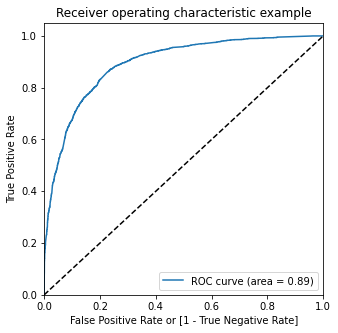

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Find Optimal CutOff Point

In [133]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076089,302,0,8,1,0,0,0,0,0,0,0,0,0
1,0,0.018175,6087,0,2,1,0,0,0,0,0,0,0,0,0
2,0,0.275972,1033,0,28,1,1,1,0,0,0,0,0,0,0
3,0,0.227453,7656,0,23,1,1,1,0,0,0,0,0,0,0
4,1,0.779505,3241,1,78,1,1,1,1,1,1,1,1,0,0


In [134]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.641993  0.969522  0.439898
0.2   0.2  0.766462  0.916804  0.673698
0.3   0.3  0.800880  0.873147  0.756290
0.4   0.4  0.815653  0.779654  0.837865
0.5   0.5  0.819582  0.708814  0.887929
0.6   0.6  0.809995  0.634679  0.918170
0.7   0.7  0.783435  0.516474  0.948158
0.8   0.8  0.764105  0.433278  0.968234
0.9   0.9  0.718529  0.282125  0.987802


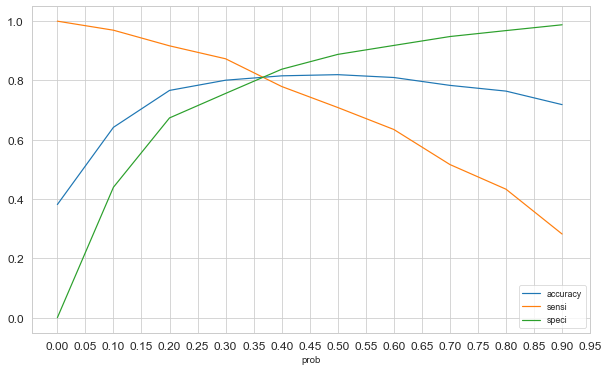

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") 
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [136]:
# Let us make the final prediction using 0.36 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076089,302,0,8,1,0,0,0,0,0,0,0,0,0,0
1,0,0.018175,6087,0,2,1,0,0,0,0,0,0,0,0,0,0
2,0,0.275972,1033,0,28,1,1,1,0,0,0,0,0,0,0,0
3,0,0.227453,7656,0,23,1,1,1,0,0,0,0,0,0,0,0
4,1,0.779505,3241,1,78,1,1,1,1,1,1,1,1,0,0,1


In [137]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112525538268113

In [138]:
# creating 2nd confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3209,  726],
       [ 475, 1953]], dtype=int64)

In [139]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [140]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8043657331136738

In [141]:
# Let us calculate specificity

TN / float(TN+FP)

0.8155019059720457

In [142]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18449809402795425


In [143]:
# Positive predictive value 

print (TP / float(TP+FP))

0.729003359462486


In [144]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8710640608034745


### Precision and Recall

In [145]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3494,  441],
       [ 707, 1721]], dtype=int64)

In [146]:
#importing libraries

from sklearn.metrics import precision_score, recall_score

In [147]:
# calculating precision score

precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
precision

0.7960222016651248

In [148]:
# calculating recall score

recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.7088138385502472

### Precision and Recall Tradeoff

In [149]:
#importing libraries

from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

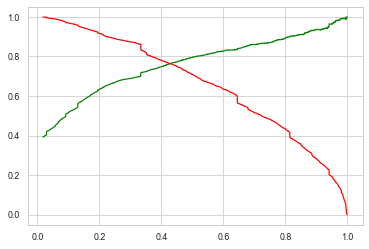

In [152]:
sns.set_style("whitegrid") 
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7498910675381264

## Step 11: Making Predictions on Test Set

In [154]:
#scaling test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [155]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Not Available,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
6906,0,0.235294,0.673415,0,0,0,0,1,0,0,1,0,0
1873,0,0.117647,0.081866,0,0,0,0,1,0,0,1,1,0
771,0,0.411765,0.021567,0,0,0,0,0,0,0,1,0,0
4495,0,0.235294,0.063380,0,0,0,0,0,0,0,1,0,0
9061,0,0.117647,0.786972,0,0,0,0,0,1,0,0,1,0


In [156]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on test set

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

6906    0.913911
1873    0.245183
771     0.155817
4495    0.159621
9061    0.388614
4929    0.488937
2308    0.038818
1034    0.060011
9033    0.123206
7008    0.916867
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head

y_pred_1.head()

,0
6906,0.913911
1873,0.245183
771,0.155817
4495,0.159621
9061,0.388614


In [161]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Converted,LeadId,0
0,1,6906,0.913911
1,0,1873,0.245183
2,0,771,0.155817
3,0,4495,0.159621
4,1,9061,0.388614


In [166]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [167]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [168]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,6906,1,0.913911
1,1873,0,0.245183
2,771,0,0.155817
3,4495,0,0.159621
4,9061,1,0.388614


In [169]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.36

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,6906,1,0.913911,1
1,1873,0,0.245183,0
2,771,0,0.155817,0
3,4495,0,0.159621,0
4,9061,1,0.388614,1


In [170]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8038137147048038

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1348,  312],
       [ 223,  844]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7910028116213683

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8120481927710843

In [175]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,6906,1,0.913911,1,91
1,1873,0,0.245183,0,25
2,771,0,0.155817,0,16
3,4495,0,0.159621,0,16
4,9061,1,0.388614,1,39
5,4929,1,0.488937,1,49
6,2308,0,0.038818,0,4
7,1034,0,0.060011,0,6
8,9033,0,0.123206,0,12
9,7008,1,0.916867,1,92


#### Precision and Recall metrics for the test set:

In [176]:
#precision

precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision

0.7301038062283737

In [177]:
#recall

recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall

0.7910028116213683

## Conclusion

### Lead Score in Training and Test data:

In [178]:
#train data with 'Lead Score'

y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076089,302,0,8,1,0,0,0,0,0,0,0,0,0,0
1,0,0.018175,6087,0,2,1,0,0,0,0,0,0,0,0,0,0
2,0,0.275972,1033,0,28,1,1,1,0,0,0,0,0,0,0,0
3,0,0.227453,7656,0,23,1,1,1,0,0,0,0,0,0,0,0
4,1,0.779505,3241,1,78,1,1,1,1,1,1,1,1,0,0,1
5,0,0.039547,5738,0,4,1,0,0,0,0,0,0,0,0,0,0
6,0,0.090552,7366,0,9,1,0,0,0,0,0,0,0,0,0,0
7,0,0.025054,3680,0,3,1,0,0,0,0,0,0,0,0,0,0
8,1,0.764215,4170,1,76,1,1,1,1,1,1,1,1,0,0,1
9,0,0.065502,43,0,7,1,0,0,0,0,0,0,0,0,0,0


In [179]:
#Test data with 'Lead Score'

y_pred_final.head(10)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,6906,1,0.913911,1,91
1,1873,0,0.245183,0,25
2,771,0,0.155817,0,16
3,4495,0,0.159621,0,16
4,9061,1,0.388614,1,39
5,4929,1,0.488937,1,49
6,2308,0,0.038818,0,4
7,1034,0,0.060011,0,6
8,9033,0,0.123206,0,12
9,7008,1,0.916867,1,92


### Comparing the values obtained by Train & Test data:

***Train Data:***

* Accuracy : 81.13%
* Senstivity : 80.44%
* Specificity : 81.55%
* Precision : 79.60%
* Recall : 70.88%

***Test Data:***

* Accuracy : 80.38%
* Senstivity : 79.10%
* Specificity : 81.20%
* Precision : 73.01%
* Recall : 79.10%

* While we have checked both Sensitivity, Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* The 'Accuracy', 'Senstivity' and 'Specificity' of both Train and test dataset are almost same.